# Lab session 3 ---- Linear Classification

Student: VAMSHI KODIPAKA                       
Date: 19-MAY-2019

## I. Introduction
In this lab, we will implement linear discriminant analysis and logistic regression.
We will try to recognize images.
You shall submit a clearly written and commented report as well as your own code.

## II. Female or Male?
The file heightWeightData.txt contains some data showing the height and weight of different people. The first column is the class label (1=male, 2=female), the second column is the height and the third is the weight.

## Question 1
Extract the height/weight data corresponding to males. 

In [1]:
from numpy import*
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat
from scipy.optimize import minimize

#import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse


In [2]:
# load the heightWeight Data
data = np.loadtxt("heightWeightData.txt", delimiter= ",")
X = data[:,1:3]
y = data[:,0]

In [3]:
def plot_cov_ellipse(cov, pos, nstd, ax=None, **kwargs):
    
    # find eigen values and eigen vectors
    eigvals, eigvecs = np.linalg.eigh(cov)

    #sort eigen values
    order = eigvals.argsort()[::-1]
    
    #re-annge eigen values and eigen vectors
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    theta = np.arctan2(eigvecs[:,0][1],eigvecs[:,0][0])
    

    # Width and height are "full" widths, not radius

    width,height = 2 * nstd * np.sqrt(eigvals)

    # Ellipse representation
    ellip = Ellipse(xy=pos, width=width, height = height, angle =np.degrees(theta), **kwargs)

    return ellip

67.36190476190477
145.65714285714284



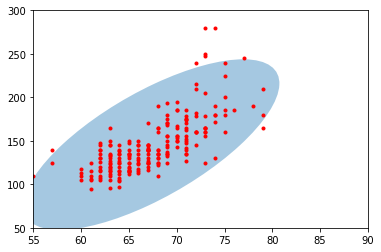

In [4]:
with open ("heightWeightData.txt") as adr:
    # load text here
    data = np.loadtxt(adr, delimiter = ',')
    data1 = data[:,1:3] # height and weight Extraction
    data2 = data[:,0] # for female
    #male = data[:]
    
    # find covariance
    cov = np.cov(data[:,1],data[:,2])
    
    # Mean of height
    dataMean_Height = np.mean(data[:,1])
    
    # mean of weight
    dataMean_Weight = np.mean(data[:,2])
    
    # plotting conv ellipse now
    e = plot_cov_ellipse(cov, (dataMean_Height,dataMean_Weight), nstd=3, alpha = 0.4)
    
    # printing the height and weight
    print(dataMean_Height)
    print(dataMean_Weight)
    print()
    
    fig, ax = plt.subplots()
    ax.plot(data[:,1], data[:,2], 'r.')
    ax.set_xlim([55, 90])
    ax.set_ylim([50, 300])
    ax.add_artist(e)
  

## Question 2 
Standardize the data (i.e. make each feature have 0 mean and unit variance) and re-estimate the
2d Gaussian.

In [5]:
def standardFeatures (X): 
    
    # calculate mean
    mu = np.mean (X, axis = 0) 
    
    # calculate variance
    sigma = np.std (X, axis = 0) 
    X_norm = (X - mu) / sigma 
    
    return X_norm, mu, sigma  


In [6]:
male = (data[:,1],data[:,2])
print(male)

# calculate standarized features
X_norm, mu, sigma = standardFeatures (male)
cov = np.cov (X_norm [:, 0], X_norm [:, 1])
mu1 = np.mean (X_norm [:, 0])
mu2 = np.mean (X_norm [:, 1]) 

#print cov ellipse
e2 = get_cov_ellipse (cov, (mu1, mu2), 3, alpha = 0.4)
print (f'Covariance MAtrix with standardization: {cov} ') 

# plot the figures
fig, ax = plt.subplots () 
ax.plot (X_norm [:, 0 ], X_norm [:, 1], 'r.') 
Ax.set_xlim ([- 3.1,4])
ax.set_ylim ([- 3.2,5]) 
ax.add_artist (e2)

(array([67., 68., 67., 60., 64., 61., 79., 61., 71., 66., 60., 71., 72.,
       55., 64., 65., 65., 71., 68., 71., 67., 70., 68., 72., 71., 65.,
       67., 66., 63., 62., 71., 64., 64., 69., 75., 65., 67., 65., 75.,
       57., 68., 73., 68., 62., 68., 74., 63., 73., 66., 68., 72., 63.,
       65., 75., 69., 72., 69., 62., 64., 63., 78., 63., 73., 69., 63.,
       63., 63., 70., 69., 61., 65., 72., 69., 70., 67., 64., 70., 71.,
       72., 66., 66., 71., 68., 67., 67., 69., 66., 71., 65., 62., 65.,
       68., 67., 63., 64., 61., 62., 63., 70., 73., 74., 79., 71., 63.,
       73., 70., 75., 62., 67., 65., 66., 69., 60., 67., 65., 66., 69.,
       73., 74., 65., 62., 64., 63., 65., 61., 73., 74., 72., 65., 73.,
       74., 75., 70., 62., 68., 57., 72., 66., 65., 63., 66., 74., 64.,
       67., 71., 60., 65., 62., 64., 66., 71., 69., 70., 64., 62., 77.,
       62., 69., 70., 71., 72., 68., 69., 63., 65., 67., 67., 73., 63.,
       73., 63., 68., 69., 69., 63., 64., 69., 63., 64., 63., 6

NameError: name 'get_cov_ellipse' is not defined

In [7]:
# male data read as array
male = np.array(data[:,1],data[:,2]).T
print(male)

copy_male = male [:, 1:] 

# Taking SVD on male data
U, S, V = np.linalg.svd (copy_male)

# Taking dot product 
cov_male = np.dot (copy_male.T, copy_male) 

# finding Eigen values and Eigen vectors
d, V = np.linalg.eigh (cov_male) 
D = np.diag (1. / np.sqrt (d)) 
W = np.dot (np.dot (V, D), VT) 
white_male = np.dot (copy_male, W) 

# Finding mean and covariance
white_height_male = white_male [ :, 0] .mean ()
white_weight_male = white_male [:, 1] .mean () 
whitecov_male = np.cov (white_male.T) 

# find whiteGaussian - by multivariant normal
whiteGauss = np.random.multivariate_normal ([white_height_male, white_weight_male], whitecov_male, 100) 

# plot the white Gaussian Data
plt. scatter (whiteGauss [:, 0], whiteGauss [:, 1], c = 'b')

TypeError: data type not understood

## Question 3
data whitening or sphering

## We now want to use the height/weight features to classify each person as male or female.
## Question 1
Use LDA to perform this classification and compute the training error. Note that we will use all data as training set.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# finding LDA
lda = LinearDiscriminantAnalysis()

# Fit the LDA
lda.fit(X,y)

# printing the Training Accuracy
print("Training Accuracy:",(lda.score(X,y.ravel()))*100,"%")

Training Accuracy: 88.09523809523809 %


## Question 2
We can also use PCA to project the data onto a 1d space. Compute the corresponding principal component and explain the difference with the decision boundary found by LDA?

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Working on Standardization
X_std = StandardScaler().fit_transform(X)

# Finding PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Finding LDA
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X_pca,y)

# Finding Training Accuracy
print("Training Accuracy:",(lda1.score(X_pca,y.ravel()))*100,"%")

Training Accuracy: 88.57142857142857 %


## III. Digits recognition

## Question 1
Data visualization

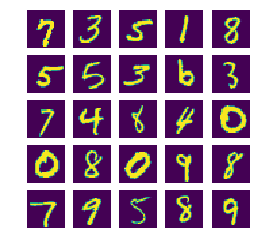

In [10]:
# Load training Data, Training Labels and Test Data and Test Labels
data_train = loadmat('trainingData.mat')
y_train = data_train['trainingLabels']
X_train = data_train['training']

data_test = loadmat('testData.mat')
y_test = data_test['testLabels']
X_test = data_test['test']

# Plot figures
fig, axis = plt.subplots(5,5,figsize=(4,4))
for i in range(5):
    for j in range(5):
        axis[i,j].imshow((X_train[np.random.randint(0,8000),:].reshape(28,28,order="F")).T)
        axis[i,j].axis("off")

## Question 2
Dimension reduction:

In [11]:
# Standarizing the Test and Train data
X_STD = np.r_[X_train,X_test]
X_STD = StandardScaler().fit_transform(X_STD)

# Using PCA Transform, Perform Dimension Reduction
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_STD)
X_PCA_train = X_PCA[0:X_train.shape[0],:]
X_PCA_test = X_PCA[X_train.shape[0]:X_PCA.shape[0],:]

/home/vamshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vamshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Question 3
Classification

In [12]:
from sklearn.linear_model import LogisticRegression

# by Logistic Regression fir the PCA
lr = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr.fit(X_PCA_train,y_train.ravel())

/home/vamshi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# predict the PCA Train
pred = lr.predict(X_PCA_train)
print('Training Accuracy: {} %'.format(np.mean(pred == y_train.ravel())*100))
pred = lr.predict(X_PCA_test)
print('Test Accuracy: {} %'.format(np.mean(pred == y_test.ravel())*100))

Training Accuracy: 39.8625 %
Test Accuracy: 45.4 %


In [14]:
# Using SVM PCA to fit the data
from sklearn.svm import LinearSVC
svm_pca = LinearSVC()
svm_pca.fit(X_PCA_train, y_train.ravel())

/home/vamshi/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
# printing the Test and Train Accuracy
print("Training Accuracy:",(svm_pca.score(X_PCA_train,y_train.ravel()))*100,"%")
print("Test Accuracy:",(svm_pca.score(X_PCA_test,y_test.ravel()))*100,"%")

Training Accuracy: 36.8125 %
Test Accuracy: 43.6 %


## Question 4
We have reduced the dimesion to 2, but this was an arbitrary choice. How can we select a better value for d?

#### Value of 'd' which gives high accuracy is the better value for 'd'

## CHEERS!